In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [87]:
import ipywidgets as widgets
from ipywidgets import interactive

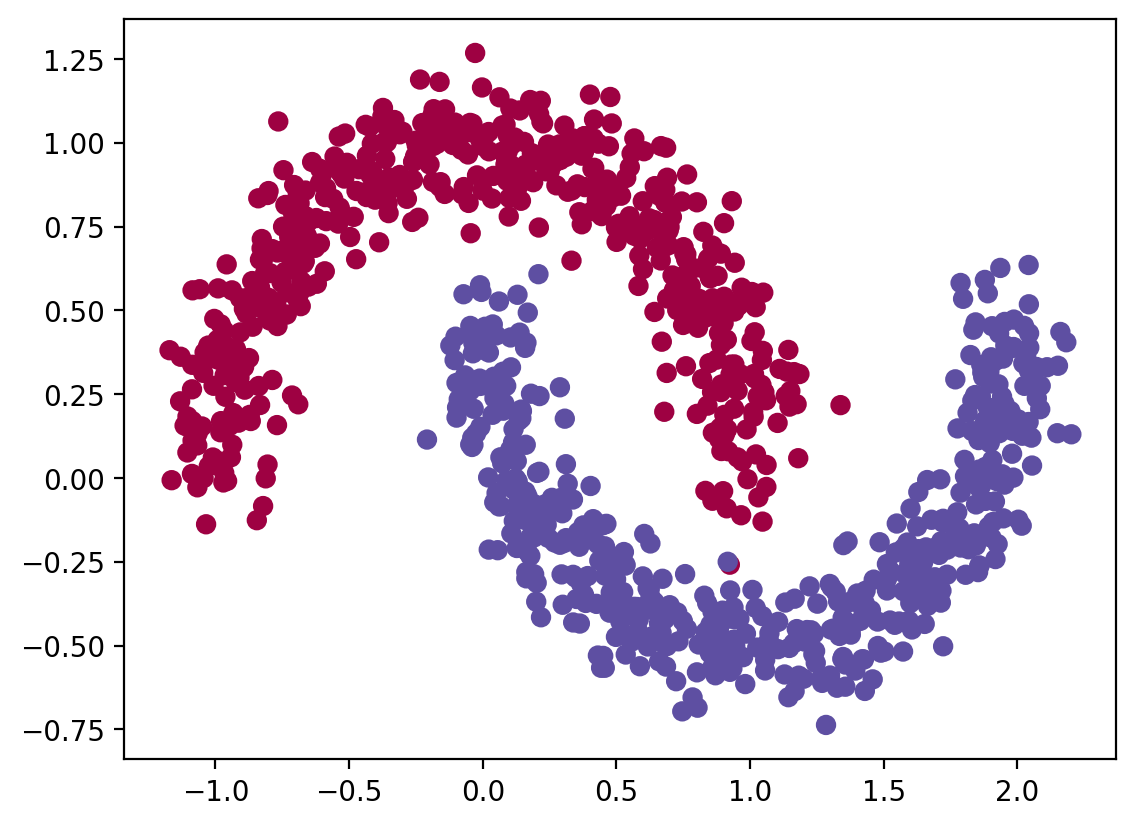

In [38]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X, y)

RandomForestClassifier(random_state=0)

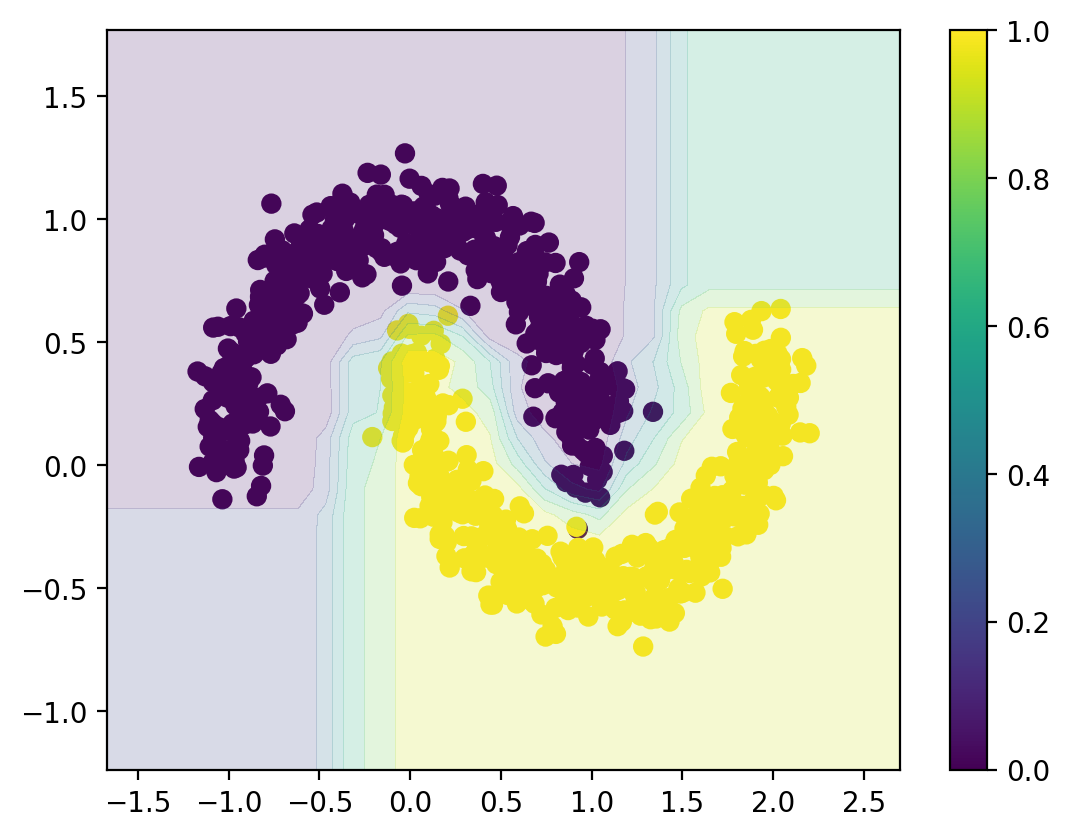

In [40]:
# Decision surface
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)
ax = plt.gca()
xlim = X[:, 0].min()-0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min()-0.5, X[:, 1].max() + 0.5

# Create grid to evaluate model
x_lin = np.linspace(xlim[0], xlim[1], 30)
y_lin = np.linspace(ylim[0], ylim[1], 30)

XX, YY = np.meshgrid(x_lin, y_lin)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rf.predict_proba(xy)[:, 1].reshape(XX.shape)

# Plot decision boundary
ax.contourf(XX, YY, Z, cmap=plt.cm.viridis, alpha=0.2);

plt.colorbar();


In [41]:
X_arr = np.array([1, 2, 3, 4])
Y_arr = np.array([5, 6, 7])

XX, YY = np.meshgrid(X_arr, Y_arr)

In [42]:
XX

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [43]:
YY

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]])

In [44]:
out = {}
count = 0
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        count = count + 1
        out[count] = {"i": i, "j": j, "XX": XX[i, j], "YY": YY[i, j]}

In [45]:
pd.DataFrame(out).T

,i,j,XX,YY
1,0,0,1,5
2,0,1,2,5
3,0,2,3,5
4,0,3,4,5
5,1,0,1,6
6,1,1,2,6
7,1,2,3,6
8,1,3,4,6
9,2,0,1,7
10,2,1,2,7


In [46]:
XX[0], YY[0]

(array([1, 2, 3, 4]), array([5, 5, 5, 5]))

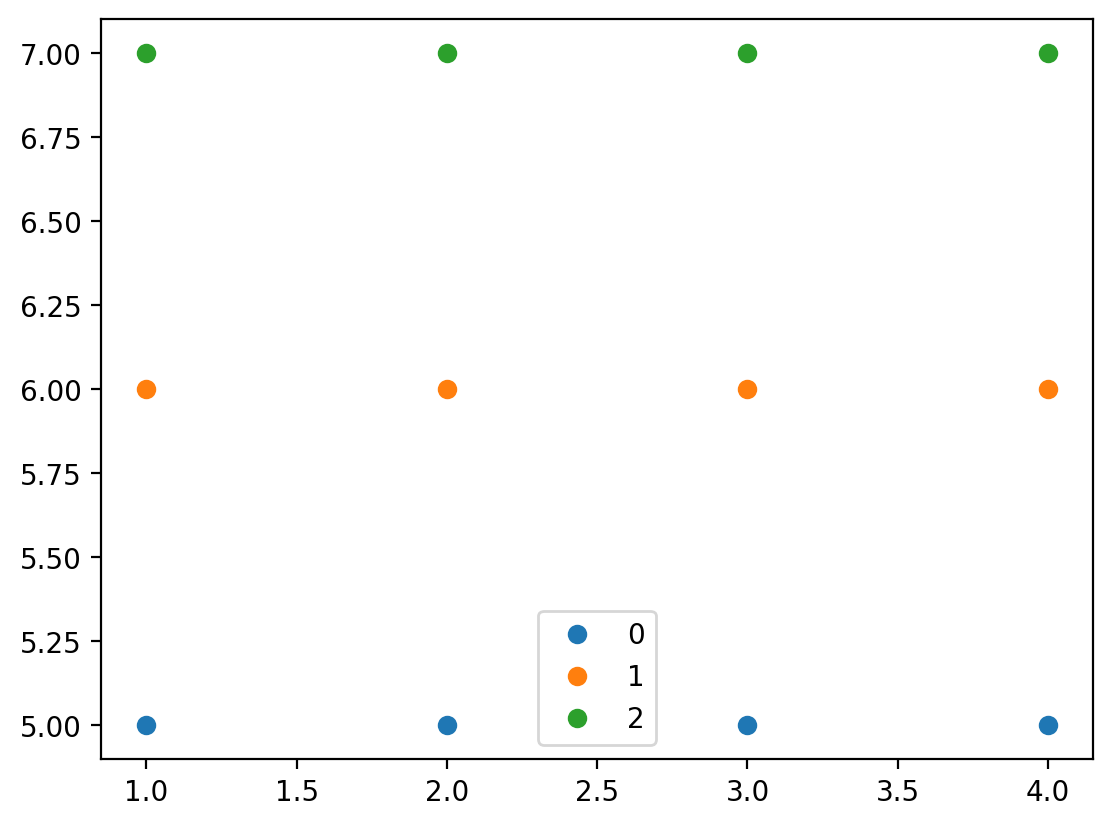

In [47]:
for i in range(XX.shape[0]):
    plt.plot(XX[i], YY[i], 'o', label=i)
plt.legend();

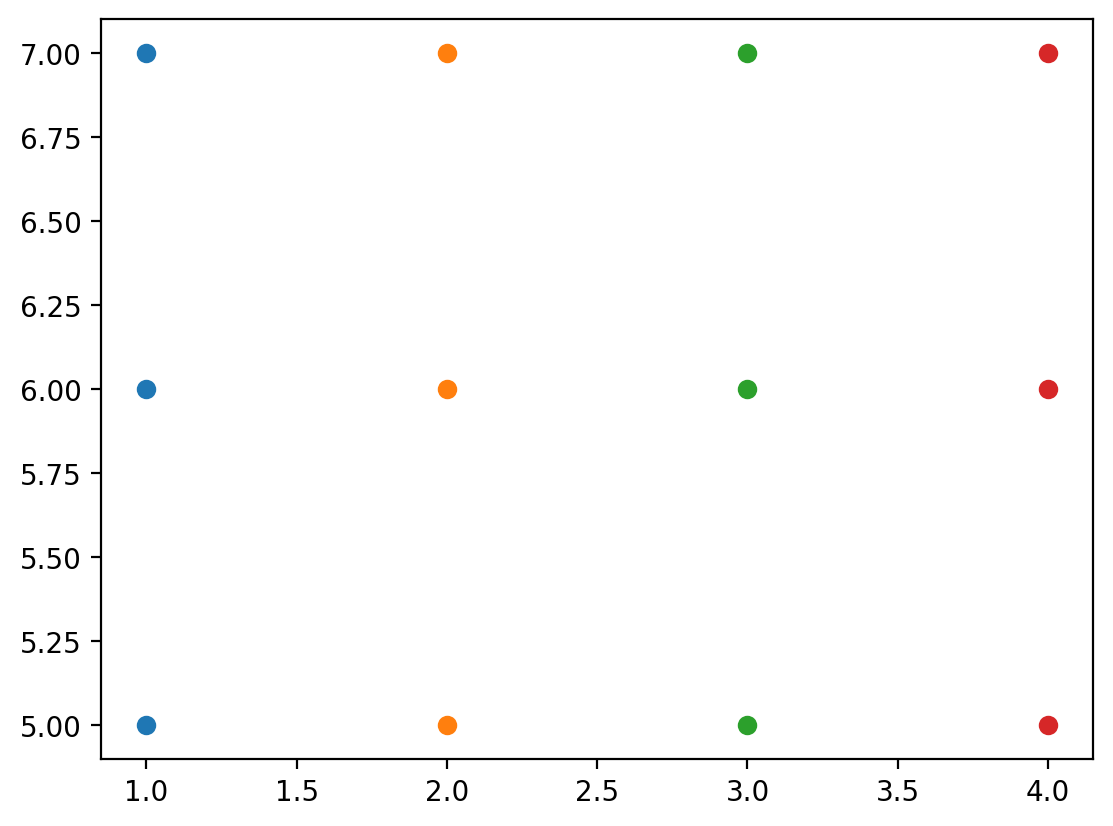

In [48]:
plt.plot(XX, YY, 'o');

In [49]:
xlim = X[:, 0].min()-0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min()-0.5, X[:, 1].max() + 0.5

# Create grid to evaluate model
x_lin = np.linspace(xlim[0], xlim[1], 30)
y_lin = np.linspace(ylim[0], ylim[1], 30)

In [50]:
x_lin

array([-1.67150293, -1.52070662, -1.36991031, -1.219114  , -1.06831769,
       -0.91752137, -0.76672506, -0.61592875, -0.46513244, -0.31433613,
       -0.16353982, -0.01274351,  0.1380528 ,  0.28884911,  0.43964542,
        0.59044173,  0.74123804,  0.89203435,  1.04283066,  1.19362697,
        1.34442328,  1.49521959,  1.6460159 ,  1.79681221,  1.94760852,
        2.09840483,  2.24920114,  2.39999745,  2.55079376,  2.70159007])

In [51]:
XX, YY = np.meshgrid(x_lin, y_lin)


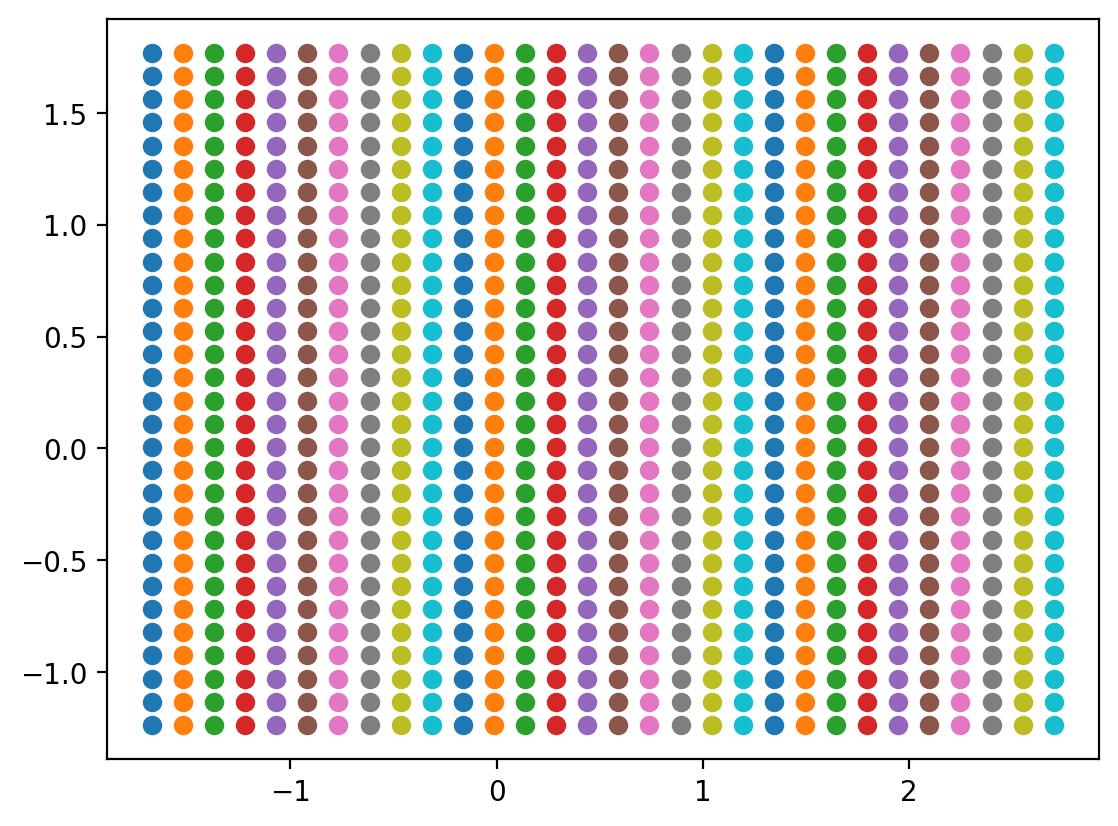

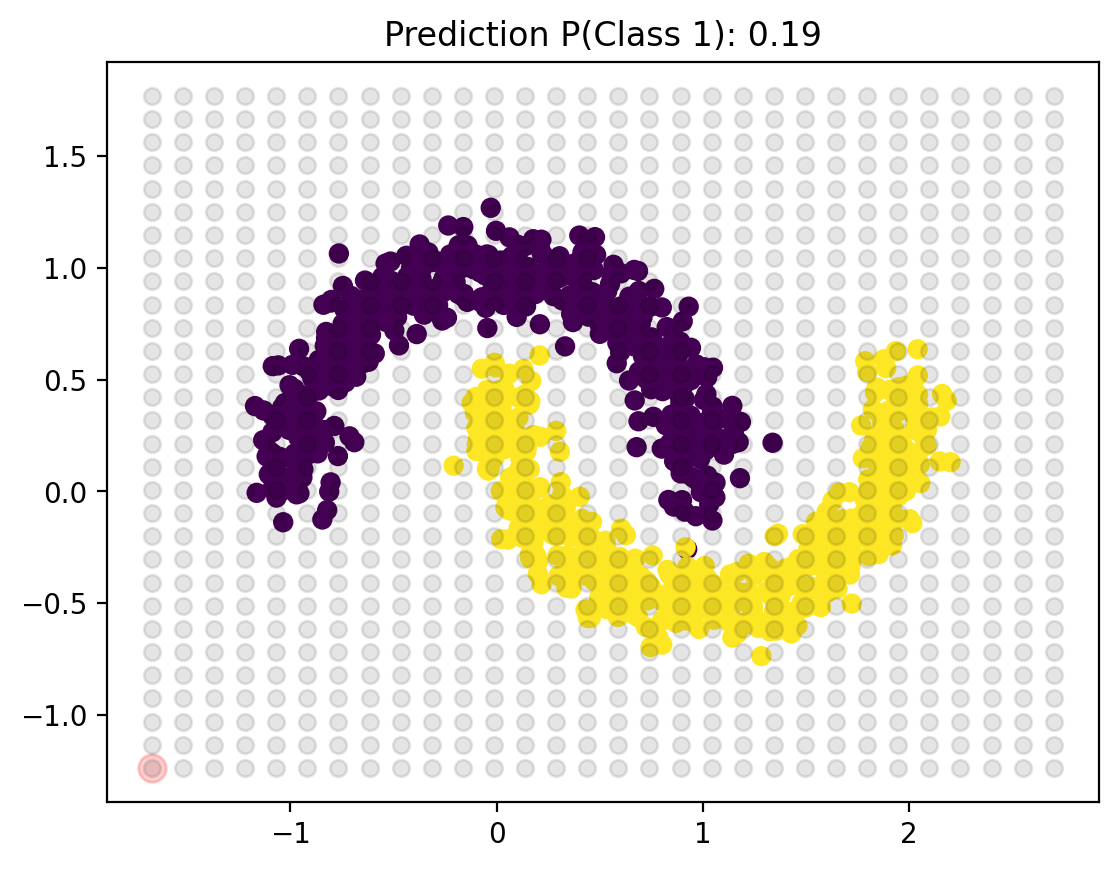

In [86]:
def update_plot(i=0, j=2):
    x_point = XX[i, j]
    y_point = YY[i, j]


    plt.plot(XX, YY, 'o', alpha=0.1, color='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)

    pred = rf.predict_proba([[x_point, y_point]])[:, 1]

    plt.scatter(x_point, y_point, s=100, alpha=pred, c='r')
    plt.title(f"Prediction P(Class 1): {pred[0]:.2f}")
    plt.show()

update_plot(0, 0)

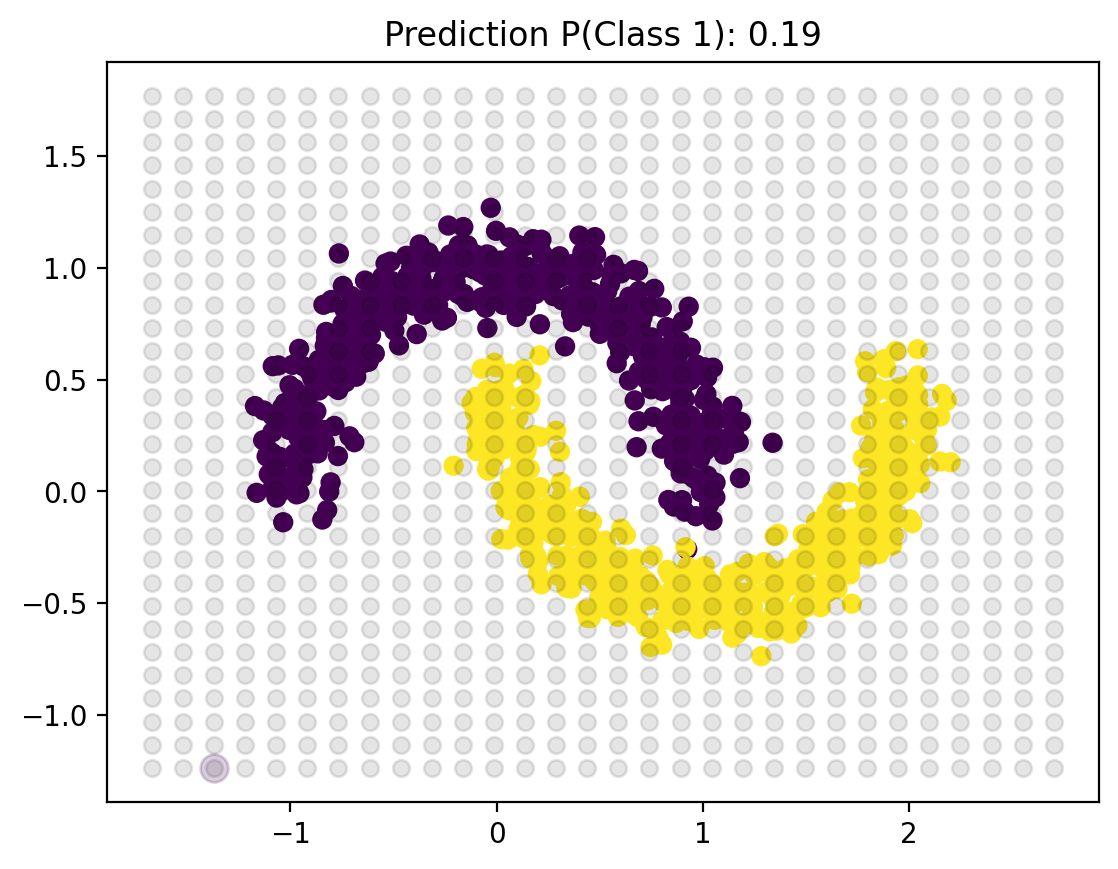

In [88]:
widget = interactive(update_plot, i=(0, XX.shape[0]-1), j=(0, XX.shape[1]-1))

# Display the widget
display(widget)

interactive(children=(IntSlider(value=0, description='i', max=29), IntSlider(value=2, description='j', max=29)…

In [94]:
XX[0], YY[:, 0]

(array([-1.67150293, -1.52070662, -1.36991031, -1.219114  , -1.06831769,
        -0.91752137, -0.76672506, -0.61592875, -0.46513244, -0.31433613,
        -0.16353982, -0.01274351,  0.1380528 ,  0.28884911,  0.43964542,
         0.59044173,  0.74123804,  0.89203435,  1.04283066,  1.19362697,
         1.34442328,  1.49521959,  1.6460159 ,  1.79681221,  1.94760852,
         2.09840483,  2.24920114,  2.39999745,  2.55079376,  2.70159007]),
 array([-1.23673767, -1.13313159, -1.02952551, -0.92591943, -0.82231335,
        -0.71870727, -0.61510119, -0.51149511, -0.40788903, -0.30428295,
        -0.20067687, -0.09707079,  0.00653529,  0.11014137,  0.21374745,
         0.31735353,  0.42095961,  0.52456569,  0.62817177,  0.73177785,
         0.83538393,  0.93899001,  1.04259609,  1.14620217,  1.24980825,
         1.35341433,  1.45702041,  1.56062649,  1.66423257,  1.76783865]))

In [102]:
XX.shape

(30, 30)

In [100]:
X_feature = np.hstack([XX.ravel(), YY.ravel()])
X_feature       

array([-1.67150293, -1.52070662, -1.36991031, ...,  1.76783865,
        1.76783865,  1.76783865])

In [99]:
XX.ravel().shape

(900,)

In [103]:
from einops import rearrange, repeat, reduce

In [104]:
XX.shape

(30, 30)

In [105]:
XX.ravel().shape

(900,)

In [109]:
rearrange(XX, 'i j -> (i j) 1').shape

(900, 1)

In [110]:
rearrange(YY, 'i j -> (i j) 1').shape

(900, 1)

In [111]:
XX_flat = rearrange(XX, 'i j -> (i j) 1')
YY_flat = rearrange(YY, 'i j -> (i j) 1')


In [115]:
np.array([XX_flat, YY_flat]).shape

(2, 900, 1)

In [116]:
rearrange([XX_flat, YY_flat], 'f n 1 -> n f').shape

(900, 2)

In [117]:
X_feature = rearrange([XX_flat, YY_flat], 'f n 1 -> n f')


In [120]:
X_feature[:32]

array([[-1.67150293, -1.23673767],
       [-1.52070662, -1.23673767],
       [-1.36991031, -1.23673767],
       [-1.219114  , -1.23673767],
       [-1.06831769, -1.23673767],
       [-0.91752137, -1.23673767],
       [-0.76672506, -1.23673767],
       [-0.61592875, -1.23673767],
       [-0.46513244, -1.23673767],
       [-0.31433613, -1.23673767],
       [-0.16353982, -1.23673767],
       [-0.01274351, -1.23673767],
       [ 0.1380528 , -1.23673767],
       [ 0.28884911, -1.23673767],
       [ 0.43964542, -1.23673767],
       [ 0.59044173, -1.23673767],
       [ 0.74123804, -1.23673767],
       [ 0.89203435, -1.23673767],
       [ 1.04283066, -1.23673767],
       [ 1.19362697, -1.23673767],
       [ 1.34442328, -1.23673767],
       [ 1.49521959, -1.23673767],
       [ 1.6460159 , -1.23673767],
       [ 1.79681221, -1.23673767],
       [ 1.94760852, -1.23673767],
       [ 2.09840483, -1.23673767],
       [ 2.24920114, -1.23673767],
       [ 2.39999745, -1.23673767],
       [ 2.55079376,

In [121]:
Z = rf.predict_proba(X_feature)[:, 1]

In [122]:
Z.shape

(900,)

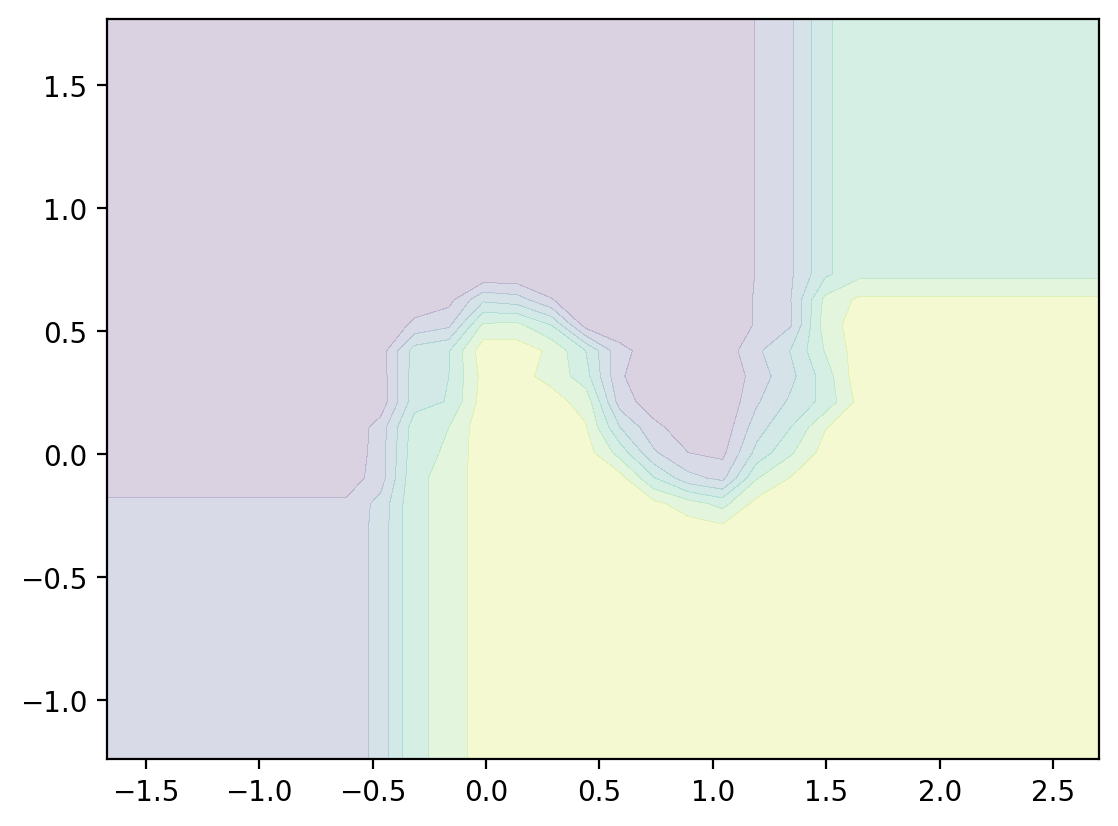

In [123]:
plt.contourf(XX, YY, Z.reshape(XX.shape), cmap=plt.cm.viridis, alpha=0.2);

In [124]:
plt.contourf?

Signature: plt.contourf(*args, data=None, **kwargs)
Docstring:
Plot filled contours.

Call signature::

    contourf([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == N`` is the number of columns in *Z* and
    ``len(Y) == M`` is the number of rows in *Z*.

    *X* and *Y* must both be ordered monotonically.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(N)``, ``Y = range(M)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.

levels : int or array-like, optional
    Determines the number and positions of the contour lines / regions.

 

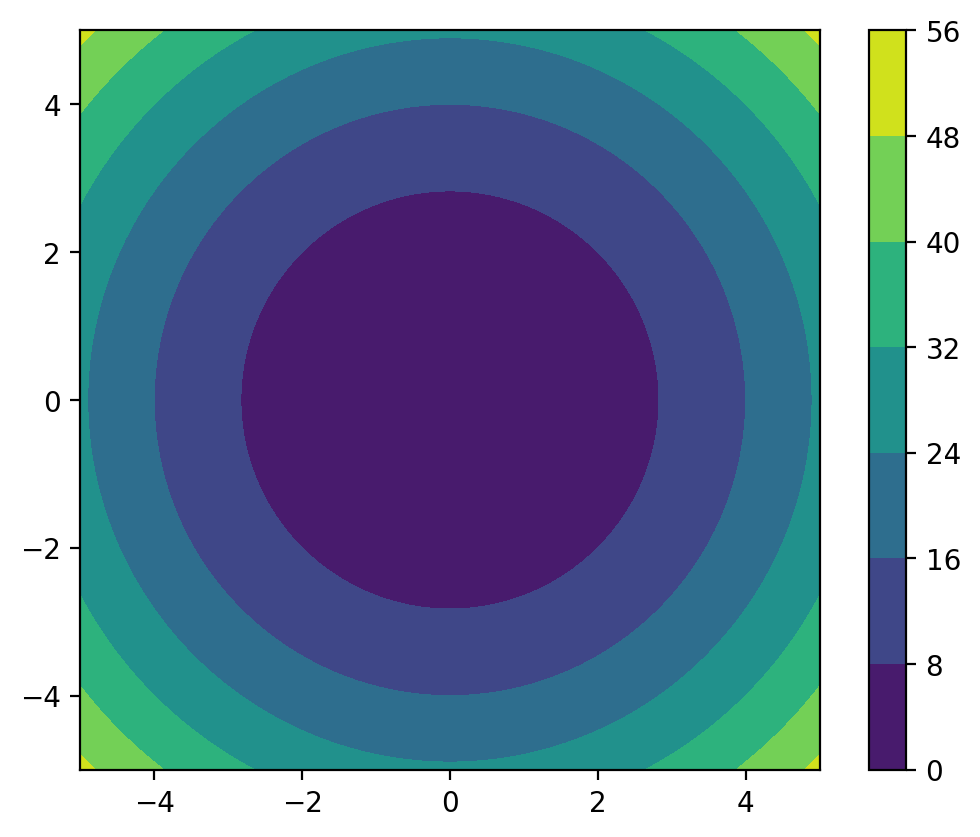

In [128]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2

plt.contourf(X, Y, Z, cmap=plt.cm.viridis);
plt.gca().set_aspect('equal')
plt.colorbar();